In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_boundaries(image):
    """
    Calculate the boundaries of the white (255) pixels in a grayscale image.

    Args:
    image (numpy.ndarray): A grayscale image where the object of interest is in white (255).

    Returns:
    tuple: The leftmost, rightmost, topmost, and bottommost coordinates of the object.
    """
    leftmost = image.shape[1]
    rightmost = 0
    topmost = image.shape[0]
    bottommost = 0

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == 255:
                leftmost = min(leftmost, j)
                rightmost = max(rightmost, j)
                topmost = min(topmost, i)
                bottommost = max(bottommost, i)

    return leftmost, rightmost, topmost, bottommost

In [6]:
def hit_or_miss(image, kernel, left, right, top, bottom):
    """
    Perform the hit-or-miss transformation on a grayscale image using a given kernel.

    Args:
    image (numpy.ndarray): The input grayscale image.
    kernel (numpy.ndarray): The hit-or-miss kernel (structuring element).
    left, right, top, bottom (int): Boundaries for processing the image.

    Returns:
    numpy.ndarray: The image after applying the hit-or-miss transformation.
    """
    h, w = image.shape
    k_h = kernel.shape[0]
    kernel_mid = k_h // 2
    result_image = image.copy()

    for i in range(top - kernel_mid, min(bottom + kernel_mid, h-kernel_mid)):
        for j in range(left - kernel_mid, min(right + kernel_mid, w-kernel_mid)):
            is_valid = True
            for k in range(k_h):
                for l in range(k_h):
                    if kernel[k][l] == 1 and image[i + k - kernel_mid][j + l - kernel_mid] != 255:
                        is_valid = False
                    elif kernel[k][l] == -1 and image[i + k - kernel_mid][j + l - kernel_mid] != 0:
                        is_valid = False

            if is_valid:
                result_image[i][j] = 255
            else:
                result_image[i][j] = 0

    return result_image

B1
B2
B3
B4
Result


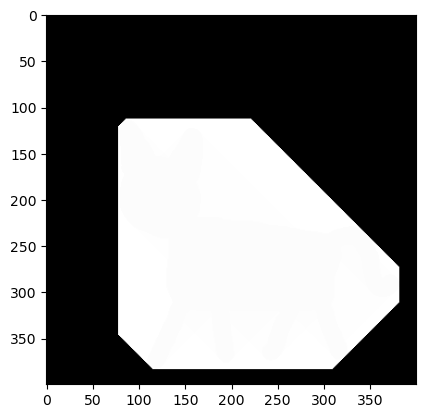

In [18]:
def iterative_hit_or_miss(image, kernel):
    """
    Apply hit-or-miss transformation iteratively until idempotence is reached.

    Args:
    image (numpy.ndarray): The input grayscale image.
    kernel (numpy.ndarray): The hit-or-miss kernel (structuring element).

    Returns:
    numpy.ndarray: The image after iterative hit-or-miss transformation.
    """
    idempotence = False
    b1 = image.copy()
    left, right, top, bottom = image_boundaries(image)
    while not idempotence:
        size = np.sum(b1 == 255)
        output_image = hit_or_miss(b1, kernel, left, right, top, bottom)
        b1 = b1 + output_image
        newsize = np.sum(b1 == 255)
        idempotence = (newsize - size == 0)
    return b1

image = cv2.imread('images/original.png', cv2.IMREAD_GRAYSCALE)

# Define kernels for hit-or-miss transformation
kernel_b1 = np.array(([1, 0, 0], [1, -1, 0], [1, 0, 0]), dtype=int)
kernel_b2 = np.array(([1, 1, 1], [0, -1, 0], [0, 0, 0]), dtype=int)
kernel_b3 = np.array(([0, 0, 1], [0, -1, 1], [0, 0, 1]), dtype=int)
kernel_b4 = np.array(([0, 0, 0], [0, -1, 0], [1, 1, 1]), dtype=int)

# Apply iterative hit-or-miss transformation with different kernels
b1 = iterative_hit_or_miss(image, kernel_b1)
print("B1")
plt.imshow(b1,cmap='gray')
plt.show()
b2 = iterative_hit_or_miss(image, kernel_b2)
print("B2")
plt.imshow(b2,cmap='gray')
plt.show()
b3 = iterative_hit_or_miss(image, kernel_b3)
print("B3")
plt.imshow(b3,cmap='gray')
plt.show()
b4 = iterative_hit_or_miss(image, kernel_b4)
print("B4")
plt.imshow(b4,cmap='gray')
plt.show()

# Combine the results of the transformations
result = b1 + b2 + b3 + b4
print("Result")
plt.imshow(result,cmap='gray')
plt.show()